In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 분석에 필요한 다양한 라이브러리를 import합니다.
1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
    - <https://pandas.pydata.org/docs/user_guide/index.html>

2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
    - <https://numpy.org/doc/stable/>


3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
    - <https://matplotlib.org/stable/users/index>


4. scikit-learn: 데이터 분석을 위한, 쉽고 효율적인 여러 도구를 제공합니다.
    - <https://scikit-learn.org/stable/user_guide.html>

In [2]:
pd.set_option('display.max_columns', None)
Data_PATH = '../../Data/tox21_dataset.csv'
df = pd.read_csv(Data_PATH)
df = df.dropna(subset=['NR-AR'])
df = df.drop(columns=['NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'])
df = df.drop(columns='mol_id')
df

,maccs_1,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,maccs_167,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## 데이터 로드

학습에 필요한 데이터셋을 로드합니다.

절대경로나 상대경로를 지정하여 학습에 사용될 데이터셋(tox21_dataset.csv)을 pandas의 load_csv 함수를 사용하여 로드합니다.

## 데이터 내의 결측값들을 제거합니다.

반응변수, NR-AR을 제외한 다른 반응변수들은 제거합니다.

## 데이터프레임의 전체적인 모습은 위와 같습니다.

0번째 열부터 166번째 열까지는 독립변수이고, 마지막 열은 반응변수(정답값)입니다.

1. 166개의 독립변수는 smiles 형식으로 표현된 화학식을 footprint로 변환한 결과입니다.
2. 반응변수는 NR-AR입니다.
    - 12가지의 독성 분석 중 NR-AR를 선택해, 독성 유무를 예측합니다.

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## 데이터프레임을 독립 변수와 종속(반응)변수로 나눕니다.

- 독립 변수는 마지막 열을 제외한 모든 열입니다. 
- 종속 변수는 마지막 열입니다.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

X = X_resampled
y = y_resampled

## SMOTE를 수행할 수 있습니다(선택).

위 코드 블럭은 SMOTE를 이용한 데이터 증강을 수행합니다. SMOTE(Synthetic Minority Over-sampling Technique)는 불균형한 데이터셋에서 소수 클래스 데이터를 증강하는 방법입니다. 데이터셋에는 종종 한 클래스의 데이터가 다른 클래스보다 훨씬 많은 경우가 있습니다. 이러한 불균형한 데이터셋을 다룰 때는 모델이 소수 클래스를 제대로 학습하지 못할 수 있습니다. 이를 해결하기 위해 SMOTE는 소수 클래스의 샘플을 증강하여 데이터셋을 균형있게 만듭니다.
- 더 자세한 내용은 아래의 링크를 참조하세요.
  - <https://arxiv.org/pdf/1106.1813.pdf>

In [4]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(num_leaves=21, max_depth = -1, n_estimators = 100, min_child_samples = 10, random_state=42)
model.fit(X, y)

[LightGBM] [Info] Number of positive: 309, number of negative: 6956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 7265, number of used features: 161
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.042533 -> initscore=-3.114019
[LightGBM] [Info] Start training from score -3.114019


LGBMClassifier(min_child_samples=10, num_leaves=21, random_state=42)

## 모델을 생성합니다.

학습에 사용할 모델은 **Light Gradient Boosting Machine(LGMB Classier)** 입니다.
- LightGBM은 결정 트리(Decision Tree)기반 앙상블 학습 알고리즘으로, 경량적인 Gradient Boosting Framework를 사용하여 고성능과 속도, 그리고 대규모 데이터 처리 능력이 있습니다.
- LGBM 모델을 생성하고, 불러온 데이터를 기반으로 모델을 학습시켜보겠습니다.
- 생성한 모델은 max_depth와 random_state 인자를 제외하면, 다른 하이퍼파라미터는 설정하지 않았기에 기본값이 사용됩니다.

## Light Gradient Boosting Machine (LightGBM) Classifier의 하이퍼파라미터

### 주요 하이퍼파라미터

1. `num_leaves` : 하나의 트리가 가질 수 있는 최대 리프의 수입니다.
2. `max_depth` : 트리의 최대 깊이를 제한합니다. 과적합을 방지하기 위해 사용됩니다.
3. `min_data_in_leaf` : 리프 노드가 가지고 있어야 할 최소 데이터 수입니다. 과적합을 방지하기 위해 사용됩니다.
4. `learning_rate` : 각 부스팅 스텝에서의 학습률입니다. 낮은 값은 학습을 더 견고하게 만들지만, 더 많은 트리가 필요합니다.
5. `n_estimators` : 부스팅을 위해 생성할 트리의 수입니다.
6. `subsample` : 트리가 성장할 때 사용할 훈련 데이터의 비율입니다. 과적합을 방지하는 데 도움이 됩니다.
7. `colsample_bytree` : 트리를 구성할 때 사용할 피처의 비율입니다.
8. `reg_alpha` : L1 정규화 항입니다. 모델의 복잡도를 줄이는 데 도움이 됩니다.
9. `reg_lambda` : L2 정규화 항입니다. 과적합을 방지하는 데 도움이 됩니다.

### 추가 하이퍼파라미터

- `objective` : 최적화할 손실 함수를 지정합니다. 이진 분류, 다중 분류 등 다양한 목적 함수를 지원합니다.
- `boosting_type` : 부스팅의 유형을 지정합니다. 기본값은 'gbdt'(Gradient Boosting Decision Tree)입니다.
- `random_state` : 결과의 재현성을 위한 난수 시드입니다.
- `n_jobs` : 병렬 처리를 위해 사용할 병렬 스레드 수입니다.
- `importance_type` : 피처 중요도를 계산하는 방법입니다.

LightGBM은 이 외에도 다양한 하이퍼파라미터를 제공합니다. 자세한 내용은 공식 문서를 참고하세요.

- 공식 문서 링크: [LightGBM Documentation](https://lightgbm.readthedocs.io/en/latest/Parameters.html)


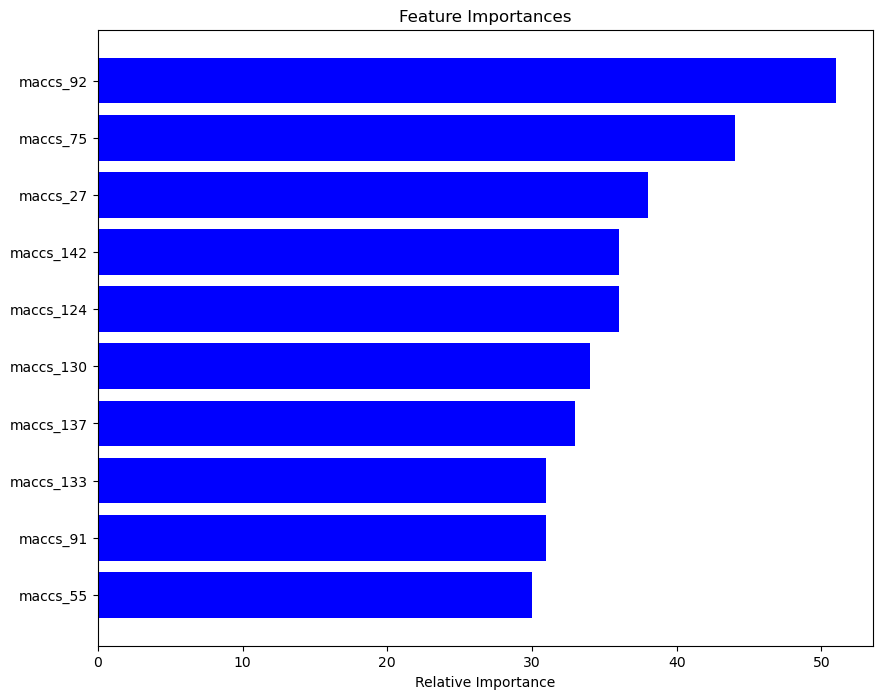

In [5]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X.columns.tolist()

feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[-10:]

# 시각화
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Light GBM Classifier 시각화

- 앙상블 기법을 사용하는 LightGBM의 특성 상, 모델은 여러 개의 결정 트리로 구성됩니다. 각 트리는 전체 모델의 예측에 일부분을 기여하며, 개별 트리 자체보다는 모든 트리의 조합이 최종 예측 성능을 결정합니다. 따라서, 개별 트리를 출력하거나 분석하는 것은 전체 모델의 작동 방식을 완전히 이해하는 데에는 한계가 있습니다.
- 피처 중요도는 모델이 어떤 피처를 기반으로 예측을 수행하는지, 그리고 각 피처가 모델의 예측 성능에 얼마나 크게 기여하는지를 확인할 수 있습니다. 피처 중요도는 모델 내 모든 트리에 걸쳐 계산되며, 특정 피처가 모델의 결정에 얼마나 영향을 미쳤는지를 나타냅니다
- 따라서 피처 중요도를 기준으로 해당 모델을 시각화할 수 있습니다.

[LightGBM] [Info] Number of positive: 309, number of negative: 6956
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7265, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.042533 -> initscore=-3.114019
[LightGBM] [Info] Start training from score -3.114019


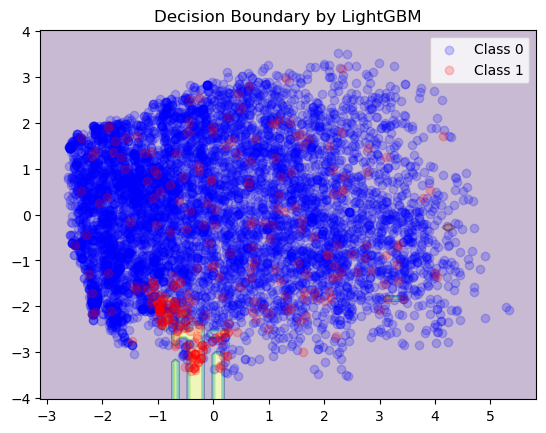

In [6]:
from sklearn.decomposition import PCA

# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 결정 트리 모델 학습
model_pca = LGBMClassifier(num_leaves=21, max_depth = -1, n_estimators = 100, min_child_samples = 10, random_state=42)
model_pca.fit(X_pca, y)

# 결정 경계 시각화를 위한 그리드 생성
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]

# LightGBM 모델을 사용하여 예측
y_pred = model_pca.predict(X_new).reshape(x1.shape)

# 결정 경계 및 데이터 포인트 시각화
plt.contourf(x1, x2, y_pred, alpha=0.3)
plt.scatter(X_pca[:, 0][y==0], X_pca[:, 1][y==0], color='blue', alpha=0.2, label='Class 0')
plt.scatter(X_pca[:, 0][y==1], X_pca[:, 1][y==1], color='red', alpha=0.2, label='Class 1')
plt.title("Decision Boundary by LightGBM")
plt.legend()
plt.show()

## 결정 경계 시각화

위 그림은 두 Feature를 사용하여 Light gbm Classifier를 학습한 결과입니다. 2차원 축을 사용하여 결정 경계를 쉽게 표현할 수 있기에, PCA를 사용하여 Feature 개수를 2개로 줄인 후 이를 시각화하였습니다.

In [7]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(X))

array([[6952,    4],
       [ 100,  209]], dtype=int64)

## 혼동 행렬을 출력합니다.

혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
- 6952개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
- 4개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
- 100개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
- 209개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)

**SMOTE 증강기법을 사용한 경우, 또는 모델의 하이퍼파라미터 설정값에 따라 분류 결과가 다르게 나타날 수 있습니다.**